# Problem 1:

### Question 1:

In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

loss_dic ={}
coeff_dic = {}
#import necessary data
data_train = pd.read_csv('wind_train.csv')
data_test = pd.read_csv('wind_test.csv')

In [ ]:

##### conduct data extraction to develop i-1 values for the regression
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp']
y_col = 'Wind'

# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]

data_shifted = data_shifted.dropna()

# Create y the known value for windspeed
y = data_train[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()


#####1.a#####

model = np.linalg.lstsq(X, y, rcond=None)
model_coeff = model[0]
error_val = model[1]
y_pred = X @ model_coeff
X_for_pred = data_train[1:]


#####1.b#####

plt.figure(figsize=(12, 6))
plt.plot(data_train['Date'], data_train['Wind'], 'o', label='Original data', markersize=1)
plt.plot(X_for_pred['Date'], y_pred , 'r', label='Fitted line')
plt.legend()
plt.show()

#####1.c#####

print(f'thetas are: {model[0]}')
print(f'training loss is {model[1]/1460}')
loss_dic['model1'] = [model[1]/1460]
coeff_dic['model1'] = model[0]
train_loss = [np.mean((y_pred-y)**2)]
loss_dic['model1'] = train_loss
"""
model_coeff = [ 0.74657977  0.13324713  0.293872   -0.30924845] which would resolve to be the theta's attached to the following features:
previous day Wind = 0.74657977
previous day Rain = 0.13324713
previous day MaxTemp = 0.293872
previous day MinTemp = -0.30924845

The interpretation of these values for theta should be that when all other values are left the same, a unit change in one feature would
result in a change in the wind speed of that value of theta.

an example would be that if the previous days MinTemp was 1 higher, the wind value would be predicted 0.3092 lower
"""


# Shift feature columns by one day
data_shifted_test = data_test[X_cols].shift(1)
data_shifted_test.columns = [col + '_prev_day' for col in data_shifted_test.columns]

data_shifted_test = data_shifted_test.dropna()

# Create y the known value for windspeed
y = data_test[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted_test

# Convert to numpy arrays
X_test = X.to_numpy()
y_test = y.to_numpy()

y_pred_test = X_test @ model_coeff
test_loss = np.mean((y_pred_test-y_test)**2)
loss_dic['model1'].append(test_loss)


### Question 2

Model 2:  Model 2 is not invertable.  Based on this the PLS formula is not valid.  The 5 X 1460 matrix has a rank of 4.  due to the nature that the MinTemp, MaxTemp and TempDiff are not linearly independent the rank is lower than the number of features.  For this reason it is not invertable.

Model 3: with the removal of MaxTemp, the rank of the matrix X in this case remains 4.  With the feature vector being 4 x 1460 the matrix is invertable and therefore the OLS formula can be applied.

In [ ]:
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp', 'TempDiff']
y_col = 'Wind'

#create new value for differential temperature
x_new = data_train['MaxTemp']-data_train['MinTemp']
data_train['TempDiff'] = x_new

# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]

data_shifted = data_shifted.dropna()
del data_shifted['MaxTemp_prev_day']
# Create y the known value for windspeed
y = data_train[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()




model = np.linalg.lstsq(X, y, rcond=None)
model_coeff = model[0]
error_val = model[1]
y_pred = X @ model_coeff
X_for_pred = data_train[1:]
print(f'thetas are: {model[0]}')
print(f'training loss is {model[1]/1460}')

coeff_dic['model3'] = model[0]
train_loss = [np.mean((y_pred-y)**2)]
loss_dic['model3'] = train_loss

#######

#create new value for differential temperature
x_new = data_test['MaxTemp']-data_test['MinTemp']
data_test['TempDiff'] = x_new

# Shift feature columns by one day
data_shifted_test = data_test[X_cols].shift(1)
data_shifted_test.columns = [col + '_prev_day' for col in data_shifted_test.columns]

data_shifted_test = data_shifted_test.dropna()
del data_shifted_test['MaxTemp_prev_day']



# Create y the known value for windspeed
y = data_test[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted_test

# Convert to numpy arrays
X_test = X.to_numpy()
y_test = y.to_numpy()

y_pred_test = X_test @ model_coeff
test_loss = np.mean((y_pred_test-y_test)**2)
loss_dic['model3'].append(test_loss)

Mark 4: with the introduction of nonlinearity through the squareroot of the differential temperature the rank of this matrix is now 5.  That included with the features matrix being 5 x 1460 shows that this matrix is invertable.

In [ ]:
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp', 'TempDiff']
y_col = 'Wind'

#create new value for differential temperature
x_new = data_train['MaxTemp']-data_train['MinTemp']
x_new_sqrt = x_new.apply(np.sqrt)
data_train['TempDiff'] = x_new_sqrt

# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]

data_shifted = data_shifted.dropna()

# Create y the known value for windspeed
y = data_train[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()


model = np.linalg.lstsq(X, y, rcond=None)
model_coeff = model[0]
error_val = model[1]
y_pred = X @ model_coeff
X_for_pred = data_train[1:]
print(f'thetas are: {model[0]}')
print(f'training loss is {model[1]/1460}')
coeff_dic['model4'] = model[0]
train_loss = np.mean((y_pred-y)**2)
loss_dic['model4'] = [train_loss]


#######


# Shift feature columns by one day
data_shifted_test = data_test[X_cols].shift(1)
data_shifted_test.columns = [col + '_prev_day' for col in data_shifted_test.columns]

data_shifted_test = data_shifted_test.dropna()

# Create y the known value for windspeed
y = data_test[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted_test

# Convert to numpy arrays
X_test = X.to_numpy()
y_test = y.to_numpy()

y_pred_test = X_test @ model_coeff
test_loss = np.mean((y_pred_test-y_test)**2)
loss_dic['model4'].append(test_loss)

In [ ]:
df_loss = pd.DataFrame.from_dict(loss_dic)
df_loss.index = ['train_loss', 'test_loss']
print(f"model 1 coefficients are {coeff_dic['model1']}")
print(f"model 3 coefficients are {coeff_dic['model3']}")
print(f"model 4 coefficients are {coeff_dic['model4']}")

In [ ]:
print('Loss Values for the applicable models')
print(df_loss) 

### Question 3

In [ ]:
#I want to make a list x which has numbers from -1 to 1 in 0.01 increments
X = np.arange(-1, 1, 0.01)
y = 2*np.exp(X)-2*X-2
plt.plot(X, y)

The implementation of this new loss function provides a higher rate of increase for the loss when x>1 as seen by y = 1.4 at x=1 and 0.8 at x=-1

# Problem 2:

##Question a

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#import necessary data
data_train = pd.read_csv('forest_fires_train.csv')
data_test = pd.read_csv('forest_fires_test.csv')

In [19]:
##### conduct data extraction to develop i-1 values for the regression

X = data_train.iloc[:, 3:-1] 
y = data_train.iloc[:, -1]
X = X.to_numpy()

y = y.to_numpy()
#standardize X
X = (X - X.mean(axis=0)) / X.std(axis=0)
#add column of ones at front of x for theta0
X = np.column_stack((np.ones(X.shape[0]), X))

X_test = data_test.iloc[:, 3:-1] 
y_test = data_test.iloc[:, -1]
X_test = X_test.to_numpy()

y_test = y_test.to_numpy()
#standardize X
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
#add column of ones at front of x for theta0
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))


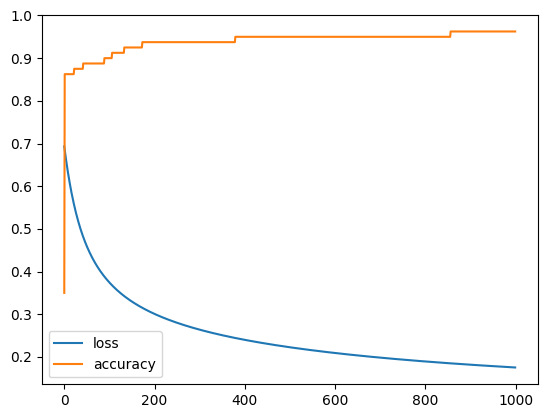

In [12]:
#create sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def accuracy_check(X, y, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    y_pred = np.round(h)
    accuracy = np.mean(y_pred == y)
    return accuracy

def logistic_regression_gradient_descent(X, y, lamb, learning_rate=0.01, iterations=1000):
    loss_track = []
    accuracy_track = []
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        loss_track.append(loss)
        accuracy_track.append(accuracy_check(X, y, theta))
        gradient = np.dot(X.T, (h - y)) / m + (lamb / m) * theta
        theta -= learning_rate * gradient
        
    plt.plot(loss_track, label='loss')
    plt.plot(accuracy_track, label = 'accuracy')
    plt.legend()

    return theta


model_coeff = logistic_regression_gradient_descent(X, y, 1)

In [4]:
i=0
for theta in model_coeff:
    print(f'theta {i} is {theta}')
    i+=1

theta 0 is 0.8011240072665884
theta 1 is 0.4821478702344288
theta 2 is -0.301657787393724
theta 3 is 0.2045831067119174
theta 4 is -0.35065852848614815
theta 5 is 0.924916792810534
theta 6 is 0.28461335173876107
theta 7 is 0.30881147537635745
theta 8 is 0.47938938084064414
theta 9 is 0.29764603727015293
theta 10 is 0.4636732451244573


In [25]:
def fit(X, y, phi, lmbd, pen):
    '''
    Fits a logistic regression model on the data (X, y), using the parameters
    phi and lmbd. Returns the learned regression coefficients theta
    '''
    if lmbd == 0: # no regularization
        theta = LogisticRegression(penalty=None, solver = 'saga', max_iter = 10000)
    else:
        # C is inverse of lambda
        theta = LogisticRegression(penalty=pen, C=1/lmbd, solver = 'saga', max_iter= 10000)
    
    # Assuming phi is feature mask
    theta.fit(X[:, phi], y)
    # cofficients of model can be access by theta.coef_ and theta.intercept_
    return theta


def predict(X, phi, theta):
    '''
    Returns predictions for given model theta on phi(X).
    '''
    return theta.predict_proba(X[:, phi])


def logloss(y, y_hat):
    '''
    Returns logistic loss between targets y and predictions y_hat.
    '''
    return log_loss(y, y_hat)


def sweep_hyperparameters(X_train, y_train, X_val, y_val, lmbds, phis, pens):
    '''
    Finds the best settings of lambda and phi, and trains a logistic regression model with these parameters.
    '''
    best_lmbd, best_phi, best_theta = None, None, None
    best_err = float('inf')
    for pen in pens:
        loss_tracker = []
        for phi in phis:
            for lmbd in lmbds:
                # train model on train data
                theta = fit(X_train, y_train, phi, lmbd, pen)
                # evaluate on val data
                y_pred = predict(X_val, phi, theta)
                val_loss = logloss(y_val, y_pred)
                loss_tracker.append(val_loss)
                if val_loss < best_err:
                    best_err = val_loss
                    best_lmbd = lmbd
                    best_phi = phi
                    best_theta = theta
            print(f'best lambda for {pen} is {best_lmbd}')
        plt.plot(loss_tracker, label = pen)
    plt.legend()
    return best_lmbd, best_phi, best_theta

def evaluate_model(theta, phi, X_test, y_test):
    '''
    Evaluates a trained logistic regression model.
    '''
    y_pred = predict(X_test, phi, theta)
    test_loss = logloss(y_test, y_pred)
    return test_loss


def train_and_eval_model(X, y, X_test, y_test, lmbds, phis, pen):
    '''
    Uses a feature matrix X and labels y to train and evaluate
    a logistic regression model.

    Sweeps over all combinations of lambda and phi to choose the
    best setting.
    '''
    # 1. Split data into groups
    n_samples = len(X)
    n_train = int(n_samples * 0.5)
    n_val = int(n_samples * 0.25)
    X_train, y_train = X[:n_train], y[:n_train]
    X_val, y_val = X[n_train:n_train+n_val], y[n_train:n_train+n_val]
    X_test, y_test = X[n_train+n_val:], y[n_train+n_val:]

    # 2. Choose best hyperparameters and train model w/ these parameters
    best_lmbd, best_phi, best_theta = sweep_hyperparameters(X_train, y_train, X_val, y_val, lmbds, phis, pen)
    
    # 3. Produce estimate of how model will perform on unseen data
    test_loss = evaluate_model(best_theta, best_phi, X_test, y_test)
    return best_lmbd, best_phi, best_theta, test_loss


best lambda for l1 is 0
best lambda for l2 is 0
Loss for lambda = is 0.08679988658203866


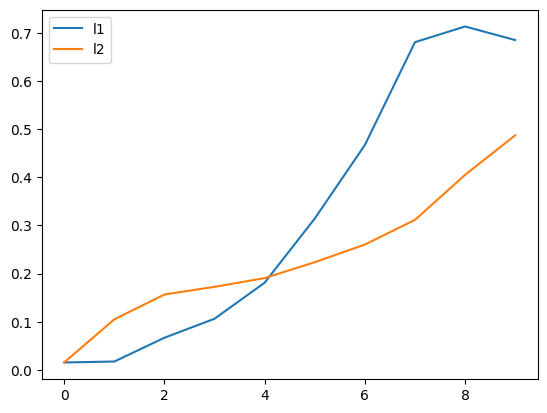

In [26]:
#N = 100
#d = 5

#phis = [np.random.choice(a=[True, False], size=d) for i in range(3)]
# make sure at least one feature from each feature mask is selected
#for phi in phis:
 #   phi[0] = True

phis = [[True,True,True,True,True,True,True,True,True, True,True]]
penalty = ['l1', 'l2']
lmbds = [0, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]
best_lmbd, best_phi, best_theta, test_loss = train_and_eval_model(X, y, X_test, y_test, lmbds, phis, penalty)
print(f'Loss for lambda = is {test_loss}')

In [22]:
from itertools import combinations

def generate_combinations():
    # Generate all combinations of 2 True and 9 False
    internal_combinations = list(combinations(range(11), 2))
    all_combinations = []
    for comb in internal_combinations:
        lst = [False] * 11
        for idx in comb:
            lst[idx] = True
        all_combinations.append(lst)
    return all_combinations

# Generate all combinations
phi_list = generate_combinations()


In [36]:
print(best_theta.coef_)

[[ 1.63878731 21.70157618]]


In [38]:
print(best_theta.coef_)
print(best_phi)
coefficient_acc = np.zeros(11)
j=0
for i in range(11):
    if best_phi[i] == True:
        coefficient_acc[i] = best_theta.coef_[0][j]
        j += 1

print(coefficient_acc)

[[ 1.63878731 21.70157618]]
[False, False, False, False, True, True, False, False, False, False, False]
[ 0.          0.          0.          0.          1.63878731 21.70157618
  0.          0.          0.          0.          0.        ]


best lambda for l1 is 5
best lambda for l1 is 50
best lambda for l1 is 50
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda for l1 is 0
best lambda fo

1.0

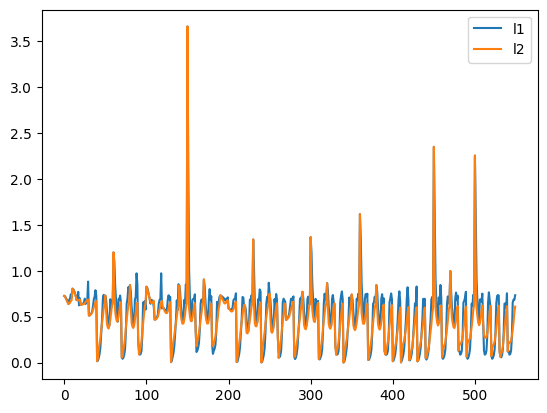

In [39]:
penalty = ['l1', 'l2']
lmbds = [0, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]
best_lmbd, best_phi, best_theta, test_loss = train_and_eval_model(X, y, X_test, y_test, lmbds, phi_list, penalty)
print(f'best phi is {best_phi}')
accuracy_check(X_test, y_test, coefficient_acc)